## Эксперимент №1 - Подготовка

In [5]:
import numpy as np
import scipy as sc
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline

import csv

In [6]:
import ensembles

In [7]:
data = pd.read_csv(r'/Users/ivanevgenyevich/MyProjects/Ensembles_Server/scripts/kc_house_data.csv')

In [108]:
data.shape

(21613, 19)

In [8]:
target = data['price']
data = data.drop(['price'], axis = 1)
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
data['num_month'] = 0

In [10]:
data['datetime'] = pd.to_datetime(data['date']).dt.date
for i in range(data.shape[0]):
    data['num_month'][i] = data['datetime'][i].month if data['datetime'][i].year == 2014 else data['datetime'][i].month + 12

/var/folders/vd/v1vmg1ss4k32wp8y4rnm4yr40000gp/T/ipykernel_10729/3291862893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_month'][i] = data['datetime'][i].month if data['datetime'][i].year == 2014 else data['datetime'][i].month + 12


In [11]:
data = data.drop(['datetime', 'date'], axis = 1)

In [12]:
data = data.drop(['id'], axis = 1)
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,num_month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,14
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,14
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,13


In [109]:
data.groupby(['num_month'])['num_month'].agg('count')

num_month
5     1768
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
13     978
14    1250
15    1875
16    2231
17     646
Name: num_month, dtype: int64

In [13]:
data.groupby(['view'])['view'].agg('count')

view
0    19489
1      332
2      963
3      510
4      319
Name: view, dtype: int64

In [14]:
data.groupby(['waterfront'])['waterfront'].agg('count')

waterfront
0    21450
1      163
Name: waterfront, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_valid = X_valid.to_numpy()
y_valid = y_valid.to_numpy()

## Эксперимент №2 - Зависимость от параметров случайного леса

In [23]:
max_features = [3, 7, 10, 15, 18]
max_depth = [2,3,7,11, 15, None]

In [20]:
modelRF = ensembles.RandomForestMSE_n_estimators(n_estimators=1000)
res = modelRF.fit(X_train, y_train, X_valid, y_valid)

In [26]:
from sklearn.ensemble import RandomForestRegressor

reg = ensembles.RandomForestMSE(n_estimators=300)
skreg = RandomForestRegressor(n_estimators=300)
skreg.fit(X_train, y_train)

skpredict = skreg.predict(X_valid)
print(reg.score_rmse(y_valid, skpredict))

136397.5304506883


In [27]:
reg.fit(X_train, y_train)

predict = reg.predict(X_valid)
print(reg.score_rmse(y_valid, predict))

134237.62395363717


In [29]:
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='grey')

# graph_colors = [
#     'powderblue',
#     '#ff7f0e','#1f77b4',
#     '#2ca02c', '#d62728',
#     '#9467bd', '#8c564b',
#     '#e377c2', '#7f7f7f',
#     '#bcbd22', '#17becf']
# plt.rc('axes', prop_cycle=plt.cycler(color=graph_colors))
plt.rc('legend', labelspacing=0.1)

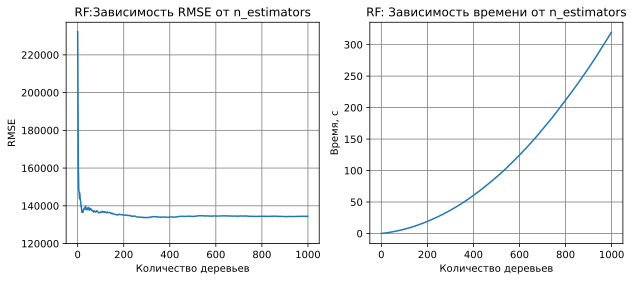

In [34]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('RF:Зависимость RMSE от n_estimators')
y = res[0]
x = np.arange(1000)
plt.plot(x, y)
plt.xlabel('Количество деревьев')
plt.ylabel('RMSE')
plt.ylim(120000)

plt.subplot(1,2,2)
plt.title('RF: Зависимость времени от n_estimators')
y = res[1]
x = np.arange(1000)
plt.plot(x, y)
plt.xlabel('Количество деревьев')
plt.ylabel('Время, с')

plt.show()
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
fig.savefig('RF-n_estimators.pdf', transparent=True, facecolor = 'white', bbox_inches = 'tight')

In [44]:
dict = {}
for f in max_features:
    for d in max_depth:
        model = ensembles.RandomForestMSE(n_estimators=300, max_depth=d, feature_subsample_size=f)
        info = model.fit(X_train, y_train, X_valid, y_valid)
        dict[f'max_features={f}, max_depth={d}'] = [info[0], info[1]]

In [61]:
ColNames = ['RMSE', 'TIME']
df = pd.DataFrame.from_dict(dict, orient='index', columns=ColNames)

In [49]:
df = df.sort_values(by=['RMSE'])
df

,RMSE,TIME
"max_features=10, max_depth=None",131541.188729,14.555967
"max_features=7, max_depth=None",133017.462868,10.902683
"max_features=15, max_depth=None",133199.107770,20.771927
"max_features=10, max_depth=15",133257.948085,12.258432
"max_features=15, max_depth=15",134114.672300,17.803902
"max_features=7, max_depth=11",134789.474781,7.148885
"max_features=18, max_depth=None",134867.429458,24.402195
"max_features=18, max_depth=15",135569.860661,21.163168
"max_features=7, max_depth=15",135697.857096,8.958775
"max_features=10, max_depth=11",135785.632218,9.819741


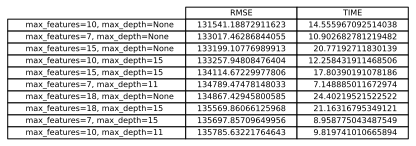

In [59]:
from matplotlib.backends.backend_pdf import PdfPages

dfh = df.head(10)
fig, ax =plt.subplots(figsize=(4,2))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=dfh.values,rowLabels=dfh.index,colLabels=dfh.columns,loc='center')

pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [103]:
RF_best_max_depth = None
RF_best_max_features = 10

## Эксперимент №3 - Зависимость от параметров градиентного бустинга

In [62]:
modelGB = ensembles.GradientBoostingMSE_n_estimators(n_estimators=1000)
res_gb = modelGB.fit(X_train, y_train, X_valid, y_valid)

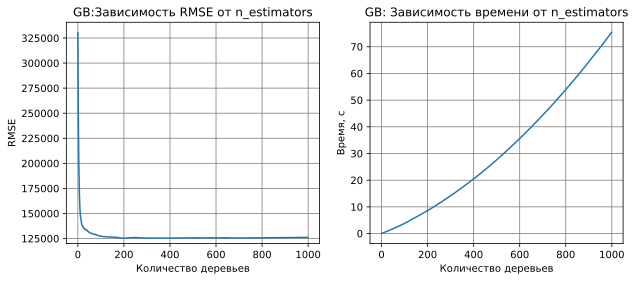

In [63]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('GB:Зависимость RMSE от n_estimators')
y = res_gb[0]
x = np.arange(1000)
plt.plot(x, y)
plt.xlabel('Количество деревьев')
plt.ylabel('RMSE')
plt.ylim(120000)

plt.subplot(1,2,2)
plt.title('GB: Зависимость времени от n_estimators')
y = res_gb[1]
x = np.arange(1000)
plt.plot(x, y)
plt.xlabel('Количество деревьев')
plt.ylabel('Время, с')

plt.show()
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
fig.savefig('GB-n_estimators.pdf', transparent=True, facecolor = 'white', bbox_inches = 'tight')

In [89]:
dict_gb = {}
for f in max_features:
    for d in max_depth:
        model = ensembles.GradientBoostingMSE(n_estimators=200, max_depth=d, feature_subsample_size=f)
        info = model.fit(X_train, y_train, X_valid, y_valid)
        dict_gb[f'max_features={f}, max_depth={d}'] = [info[0], info[1]]

In [90]:
df_gb = pd.DataFrame.from_dict(dict_gb, orient='index', columns=ColNames)
df_gb = df_gb.sort_values(by=['RMSE'])
df_gb

,RMSE,TIME
"max_features=7, max_depth=3",123977.764479,1.550904
"max_features=10, max_depth=7",124036.039344,4.760010
"max_features=15, max_depth=3",124188.826370,3.047178
"max_features=3, max_depth=3",125102.836060,0.748784
"max_features=10, max_depth=3",126518.562947,2.100318
"max_features=18, max_depth=3",127986.244043,3.668930
"max_features=18, max_depth=7",128233.331618,8.284440
"max_features=15, max_depth=7",128951.532817,7.019270
"max_features=7, max_depth=2",130576.462877,1.078563
"max_features=7, max_depth=7",132152.369411,3.388190


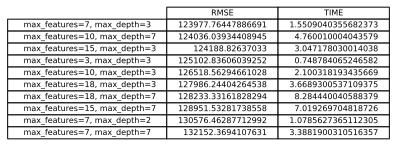

In [91]:
df_gbh = df_gb.head(10)
fig, ax =plt.subplots(figsize=(4,2))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df_gbh.values,rowLabels=df_gbh.index,colLabels=df_gbh.columns,loc='center')

pp = PdfPages("GB-table.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [92]:
GB_best_max_depth = 3
GB_best_max_features = 7

Здесь должен быть learning_rate

In [97]:
lrs = [0.05, 0.1, 0.2, 0.4, 0.7, 0.9]
dict_lr = {}
for lr in lrs:
    model = ensembles.GradientBoostingMSE(n_estimators=200, max_depth=GB_best_max_depth, feature_subsample_size=GB_best_max_features, learning_rate=lr)
    info = model.fit(X_train, y_train, X_valid, y_valid)
    dict_lr[f'learning_rate = {lr}'] = [info[0], info[1]]

In [101]:
df = pd.DataFrame.from_dict(dict_lr, orient='index', columns=ColNames)
df = df.sort_values(by=['RMSE'])
df

,RMSE,TIME
learning_rate = 0.2,121791.589529,1.525226
learning_rate = 0.1,127460.650685,1.533741
learning_rate = 0.05,128327.900569,1.538917
learning_rate = 0.4,165088.115157,1.511380
learning_rate = 0.7,258784.432462,1.558311
learning_rate = 0.9,588749.261011,1.522213


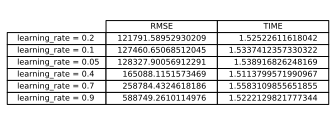

In [102]:
fig, ax =plt.subplots(figsize=(4,2))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,rowLabels=df.index,colLabels=df.columns,loc='center')

pp = PdfPages("GB-table-lr.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

а здесь на одном графике проводим сравнение ансамблей

In [105]:
modelGB = ensembles.GradientBoostingMSE_n_estimators(n_estimators=1000, max_depth=GB_best_max_depth, feature_subsample_size=GB_best_max_features)
res_gb = modelGB.fit(X_train, y_train, X_valid, y_valid)
modelRF = ensembles.RandomForestMSE_n_estimators(n_estimators=1000, max_depth=RF_best_max_depth, feature_subsample_size=RF_best_max_features)
res_rf = modelRF.fit(X_train, y_train, X_valid, y_valid)

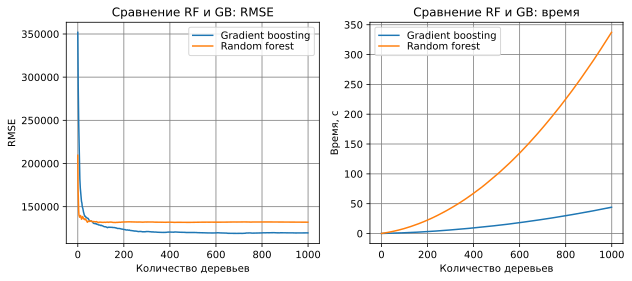

In [107]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('Сравнение RF и GB: RMSE')
y = res_gb[0]
x = np.arange(1000)
plt.plot(x, y, label='Gradient boosting')
y = res_rf[0]
plt.plot(x, y, label='Random forest')
plt.xlabel('Количество деревьев')
plt.ylabel('RMSE')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Сравнение RF и GB: время')
y = res_gb[1]
plt.plot(x, y, label='Gradient boosting')
y = res_rf[1]
plt.plot(x, y, label='Random forest')
plt.xlabel('Количество деревьев')
plt.ylabel('Время, с')
plt.legend(loc='best')

plt.show()
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
fig.savefig('comparasion.pdf', transparent=True, facecolor = 'white', bbox_inches = 'tight')

деревьев можно взять меньше для случайного леса